In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib import NERCOME, shrinkage

In [11]:
# Parameters
p = 30
n = 1600
mean = 0
sigmaA = 1
sigmaB = np.sqrt(5)

# Target matrix
T = 3*np.identity(p)

# Build true covariance matrix
C_true_A = np.full(p//2, sigmaA**2)
C_true_B = np.full(p-p//2, sigmaB**2)
C_true = np.diag(np.concatenate((C_true_A, C_true_B)))

evals_MC_sum = np.zeros(p)
evals_MCS_sum = np.zeros(p)
evals_NERCOME_sum = np.zeros(p)
lmbda_est_sum = 0
s_min_sum = 0

# Number of simulations
m = 100
for _ in range(100):
    # Build random matrix
    A = np.random.normal(mean, sigmaA, size=(p//2, n))
    B = np.random.normal(mean, sigmaB, size=(p-p//2, n))
    X = np.vstack((A, B))
    
    # Perform imported algorithms
    C_shrinkage, S1, lmbda_est = shrinkage.shrinkage_cov_matrix(X, T)
    C_nercome, S2, s_min = NERCOME.NERCOME(X)
    
    # We require the empirically estimated covariance matrices to be (almost) identical
    assert np.allclose(S1, S2, 0, 1e-10)
    
    evals_MC = np.linalg.eigvalsh(S1)
    evals_MCS = np.linalg.eigvalsh(C_shrinkage)
    evals_NERCOME = np.linalg.eigvalsh(C_nercome)
    
    evals_MC_sum += evals_MC
    evals_MCS_sum += evals_MCS
    evals_NERCOME_sum += evals_NERCOME
    lmbda_est_sum += lmbda_est
    s_min_sum += s_min

evals_MC = evals_MC_sum / m
evals_MCS = evals_MCS_sum / m
evals_NERCOME_sum = evals_NERCOME / m
lmbda_est = lmbda_est_sum / m
s_min = s_min_sum / m

print(lmbda_est)
print(s_min)

0.042381675056954074
853.6


Text(0, 0.5, 'Eigenvalues')

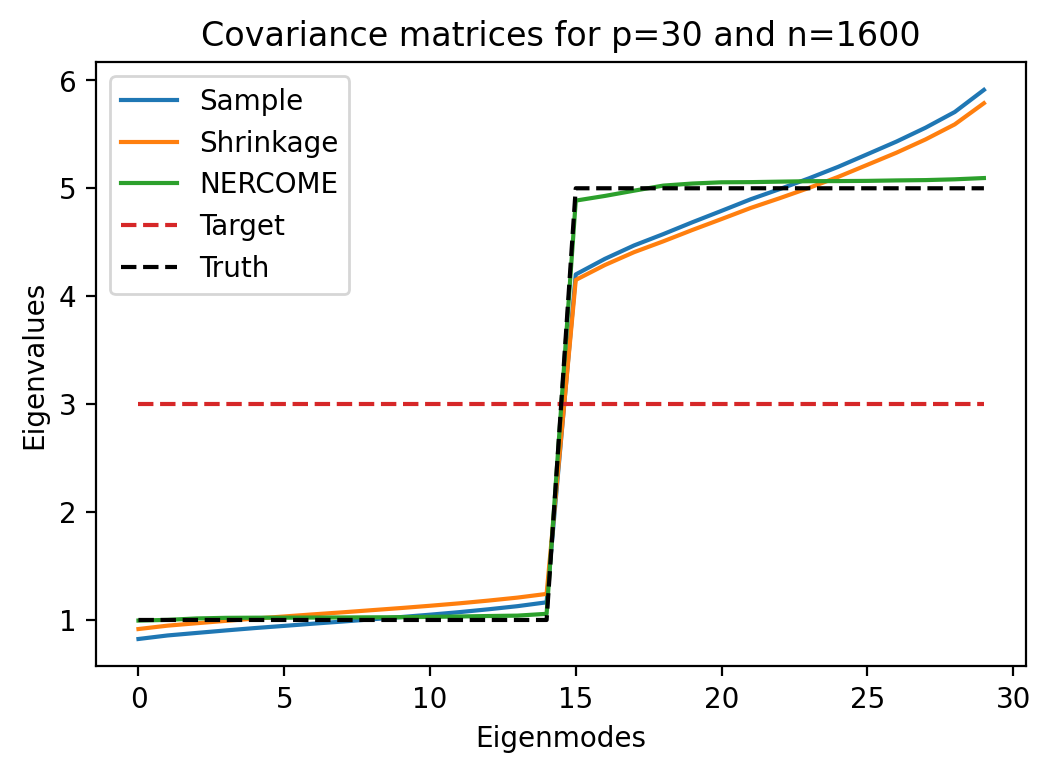

In [12]:
evals_T = np.linalg.eigvalsh(T)
evals_true = np.linalg.eigvalsh(C_true)

plt.figure(dpi=200)
plt.plot(evals_MC, label="Sample")
plt.plot(evals_MCS, label="Shrinkage")
plt.plot(evals_NERCOME, label="NERCOME")
plt.plot(evals_T, "--", label="Target")
plt.plot(evals_true, "k--", label="Truth")
plt.legend()
plt.title(f"Covariance matrices for p={p} and n={n}")
plt.xlabel("Eigenmodes")
plt.xticks(np.arange(0, 31, 5))
plt.ylabel("Eigenvalues")